# <center>Підготовка та аналіз даних</center>
# <center>Лабораторна робота №4</center>
<br>
<center>ФБ-22 Дажук Павло</center>

### <i>Хід виконання<i>

In [168]:
import pandas as pd
import numpy as np
import os
import timeit
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

## Level 1

### Pandas

In [169]:
def prepare_data_pandas_1():
    file = "household_power_consumption.txt"
    
    data = pd.read_csv(file, delimiter=';', low_memory=False)

    data.drop(data[data.eq('?').any(axis=1)].index, inplace=True)
    data.reset_index(drop=True, inplace=True)

    numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    for col in numeric_columns:
        data[col] = pd.to_numeric(data[col])
    
    data.insert(0, 'DateTime', pd.to_datetime(data['Date'] + ' ' + data['Time'], format="%d/%m/%Y %H:%M:%S"))
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    
    return data

if not os.path.exists("data_pandas_1.csv"):
    data_pandas_1 = prepare_data_pandas_1()
    data_pandas_1.to_csv("data_pandas_1.csv")
else:
    data_pandas_1 = pd.read_csv("data_pandas_1.csv", parse_dates=['DateTime'], index_col=0)
    
data_pandas_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DateTime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 140.7 MB


In [170]:
data_pandas_1.head(10)

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


### Numpy

In [171]:
def prepare_data_numpy_1():
    file = "household_power_consumption.txt"  
    dtype = [('Date', 'U10'), ('Time', 'U8'), ('Global_active_power', 'f8'), 
             ('Global_reactive_power', 'f8'), ('Voltage', 'f8'), ('Global_intensity', 'f8'), 
             ('Sub_metering_1', 'f8'), ('Sub_metering_2', 'f8'), ('Sub_metering_3', 'f8')]

    data = np.genfromtxt(file, dtype=dtype, delimiter=';', skip_header=1)
    
    data = data[~np.isnan(data['Global_active_power']) & ~np.isnan(data['Global_reactive_power'])
            & ~np.isnan(data['Voltage']) & ~np.isnan(data['Global_intensity'])
            & ~np.isnan(data['Sub_metering_1']) & ~np.isnan(data['Sub_metering_2']) & ~np.isnan(data['Sub_metering_3'])]

    return data

if not os.path.exists("data_numpy_1.txt"):
    data_numpy_1 = prepare_data_numpy_1()
    header = 'Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3'
    np.savetxt('data_numpy_1.txt', data_numpy_1, delimiter=',', fmt='%s', header=header)
else:
    data_numpy_1 = np.genfromtxt('data_numpy_1.txt', delimiter=',', dtype=None, names=True, encoding='utf-8')


print("Array size:", data_numpy_1.shape)
print("Data type in the array:", data_numpy_1.dtype)
print("Total number of elements in the array:", data_numpy_1.size)

Array size: (2049280,)
Data type in the array: [('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')]
Total number of elements in the array: 2049280


In [172]:
data_numpy_1[0:10]

array([('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.),
       ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.),
       ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.),
       ('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.),
       ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:31:00', 3.7  , 0.52 , 235.22, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:32:00', 3.668, 0.51 , 233.99, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:33:00', 3.662, 0.51 , 233.86, 15.8, 0., 2., 16.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f

<b>1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.</b>

In [173]:
def select_households_1_numpy(data):
    return data[data['Global_active_power'] > 5]

print("Numpy")
print("Execution time:", int(timeit.timeit("select_households_1_numpy(data_numpy_1)", globals=globals(), number=5) * 1000 / 5), "ms")
select_households_1_numpy(data_numpy_1)[0:10]

Numpy
Execution time: 14 ms


array([('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.),
       ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.),
       ('16/12/2006', '17:35:00', 5.412, 0.47 , 232.78, 23.2, 0., 1., 17.),
       ('16/12/2006', '17:36:00', 5.224, 0.478, 232.99, 22.4, 0., 1., 16.),
       ('16/12/2006', '17:37:00', 5.268, 0.398, 232.91, 22.6, 0., 2., 17.),
       ('16/12/2006', '17:44:00', 5.894, 0.   , 232.69, 25.4, 0., 0., 16.),
       ('16/12/2006', '17:45:00', 7.706, 0.   , 230.98, 33.2, 0., 0., 17.),
       ('16/12/2006', '17:46:00', 7.026, 0.   , 232.21, 30.6, 0., 0., 16.),
       ('16/12/2006', '17:47:00', 5.174, 0.   , 234.19, 22. , 0., 0., 17.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f

In [174]:
def select_households_1_pandas(data):
    return data[data['Global_active_power'] > 5]

print("Pandas")
print("Execution time:", int(timeit.timeit("select_households_1_pandas(data_pandas_1)", globals=globals(), number=5) * 1000 / 5), "ms")
select_households_1_numpy(data_pandas_1)

Pandas
Execution time: 2 ms


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16 17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16 17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0
...,...,...,...,...,...,...,...,...
2043377,2010-11-22 18:40:00,5.408,0.150,231.50,23.6,48.0,0.0,0.0
2043378,2010-11-22 18:41:00,5.528,0.144,232.48,24.6,53.0,0.0,0.0
2045607,2010-11-24 07:50:00,5.172,0.050,235.18,22.0,0.0,38.0,17.0
2045608,2010-11-24 07:51:00,5.750,0.000,234.40,24.6,0.0,39.0,17.0


<b>2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.</b>

In [175]:
def select_households_2_numpy(data):
    return data[data['Voltage'] > 235]

print("Numpy")
print("Execution time:", int(timeit.timeit("select_households_2_numpy(data_numpy_1)", globals=globals(), number=5) * 1000 / 5), "ms")
select_households_2_numpy(data_numpy_1)[0:10]

Numpy
Execution time: 94 ms


array([('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.),
       ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:31:00', 3.7  , 0.52 , 235.22, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:38:00', 4.054, 0.422, 235.24, 17.6, 0., 1., 17.),
       ('16/12/2006', '17:39:00', 3.384, 0.282, 237.14, 14.2, 0., 0., 17.),
       ('16/12/2006', '17:40:00', 3.27 , 0.152, 236.73, 13.8, 0., 0., 17.),
       ('16/12/2006', '17:41:00', 3.43 , 0.156, 237.06, 14.4, 0., 0., 17.),
       ('16/12/2006', '17:42:00', 3.266, 0.   , 237.13, 13.8, 0., 0., 18.),
       ('16/12/2006', '17:43:00', 3.728, 0.   , 235.84, 16.4, 0., 0., 17.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f

In [176]:
def select_households_2_pandas(data):
    return data[data['Voltage'] > 235]

print("Pandas")
print("Execution time:", int(timeit.timeit("select_households_2_pandas(data_pandas_1)", globals=globals(), number=5) * 1000 / 5), "ms")
select_households_2_pandas(data_pandas_1)

Pandas
Execution time: 48 ms


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16 17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


<b>3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.</b>

In [177]:
def select_households_3_numpy(data):
    return data[(data['Global_intensity'] >= 19) & (data['Global_intensity'] <= 20)]

print("Numpy")
print("Execution time:", int(timeit.timeit("select_households_3_numpy(data_numpy_1)", globals=globals(), number=5) * 1000 / 5), "ms")
select_households_3_numpy(data_numpy_1)[0:10]

Numpy
Execution time: 22 ms


array([('16/12/2006', '17:34:00', 4.448, 0.498, 232.86, 19.6, 0.,  1., 17.),
       ('16/12/2006', '17:48:00', 4.474, 0.   , 234.96, 19.4, 0.,  0., 17.),
       ('16/12/2006', '17:57:00', 4.512, 0.   , 233.62, 19.2, 0.,  0., 17.),
       ('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.),
       ('16/12/2006', '18:16:00', 4.524, 0.076, 234.2 , 19.6, 0.,  9., 17.),
       ('16/12/2006', '18:18:00', 4.472, 0.   , 233.29, 19.2, 0.,  1., 16.),
       ('16/12/2006', '18:36:00', 4.536, 0.   , 233.54, 19.4, 0.,  1., 17.),
       ('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.),
       ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.),
       ('17/12/2006', '01:19:00', 4.636, 0.14 , 237.37, 19.4, 0., 36.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_meteri

In [178]:
def select_households_3_pandas(data):
    return data[data['Global_intensity'].between(19, 20)]

print("Pandas")
print("Execution time:", int(timeit.timeit("select_households_3_pandas(data_pandas_1)", globals=globals(), number=5) * 1000 / 5), "ms")
select_households_3_pandas(data_pandas_1)

Pandas
Execution time: 5 ms


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
10,2006-12-16 17:34:00,4.448,0.498,232.86,19.6,0.0,1.0,17.0
24,2006-12-16 17:48:00,4.474,0.000,234.96,19.4,0.0,0.0,17.0
33,2006-12-16 17:57:00,4.512,0.000,233.62,19.2,0.0,0.0,17.0
45,2006-12-16 18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
52,2006-12-16 18:16:00,4.524,0.076,234.20,19.6,0.0,9.0,17.0
...,...,...,...,...,...,...,...,...
2045610,2010-11-24 07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2045611,2010-11-24 07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2045612,2010-11-24 07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0
2045613,2010-11-24 07:56:00,4.536,0.000,237.03,19.0,0.0,39.0,17.0


<b>4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії.</b>

In [179]:
def average_consumption_numpy(data):
    random_households_indices = np.random.choice(len(data), size=500000, replace=False)
    random_households = data[random_households_indices]
    
    # Витягуємо кожен стовпець окремо
    sub_metering_1 = random_households['Sub_metering_1']
    sub_metering_2 = random_households['Sub_metering_2']
    sub_metering_3 = random_households['Sub_metering_3']
    
    # Обчислюємо середнє значення для кожного стовпця
    average_sub_metering_1 = np.mean(sub_metering_1)
    average_sub_metering_2 = np.mean(sub_metering_2)
    average_sub_metering_3 = np.mean(sub_metering_3)
    
    return average_sub_metering_1, average_sub_metering_2, average_sub_metering_3
    
print("Numpy")
print("Execution time:", int(timeit.timeit("average_consumption_numpy(data_numpy_1)", globals=globals(), number=5) * 1000 / 5), "ms")
average_consumption = average_consumption_numpy(data_numpy_1)
print(f"Sub_metering_1: {average_consumption[0]}")
print(f"Sub_metering_2: {average_consumption[1]}")
print(f"Sub_metering_3: {average_consumption[2]}")


Numpy
Execution time: 127 ms
Sub_metering_1: 1.123972
Sub_metering_2: 1.293056
Sub_metering_3: 6.461836


In [180]:
def average_consumption_pandas(data):
    random_households = data.sample(n=500000, replace=False)
    average_consumption = random_households[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return average_consumption

print("Pandas")
print("Execution time:", int(timeit.timeit("average_consumption_pandas(data_pandas_1)", globals=globals(), number=5) * 1000 / 5), "ms")
average_consumption = average_consumption_pandas(data_pandas_1)
print(f"Sub_metering_1: {average_consumption.iloc[0]}")
print(f"Sub_metering_2: {average_consumption.iloc[1]}")
print(f"Sub_metering_3: {average_consumption.iloc[2]}")

Pandas
Execution time: 82 ms
Sub_metering_1: 1.123188
Sub_metering_2: 1.280516
Sub_metering_3: 6.448608


<b>5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.</b>

In [181]:
def select_households_5_numpy(data):
    selected_households = data[(data['Time'] > '18:00') & (data['Global_active_power'] > 6) & (data['Sub_metering_2'] > data['Sub_metering_1']) & (data['Sub_metering_2'] > data['Sub_metering_3'])]
    
    half_length = len(selected_households) // 2
    first_half = selected_households[:half_length]
    second_half = selected_households[half_length:]
    
    result = np.concatenate([first_half[::3], second_half[::4]])
    
    return result

print("Numpy")
print("Execution time:", int(timeit.timeit("select_households_5_numpy(data_numpy_1)", globals=globals(), number=5) * 1000 / 5), "ms")
select_households_5_numpy(data_numpy_1)[0:10]

Numpy
Execution time: 48 ms


array([('16/12/2006', '18:05:00', 6.052, 0.192, 232.93, 26.2,  0., 37., 17.),
       ('16/12/2006', '18:08:00', 6.308, 0.116, 232.25, 27. ,  0., 36., 17.),
       ('28/12/2006', '20:58:00', 6.386, 0.374, 236.63, 27. ,  1., 36., 17.),
       ('28/12/2006', '21:02:00', 8.088, 0.262, 235.5 , 34.4,  1., 72., 17.),
       ('28/12/2006', '21:05:00', 7.23 , 0.152, 235.22, 30.6,  1., 73., 17.),
       ('28/12/2006', '21:08:00', 7.352, 0.   , 235.45, 31.2,  1., 73., 17.),
       ('28/12/2006', '21:11:00', 9.048, 0.   , 231.48, 39. , 34., 71., 16.),
       ('28/12/2006', '21:14:00', 9.118, 0.108, 231.18, 39.4, 36., 72., 16.),
       ('28/12/2006', '21:17:00', 7.04 , 0.13 , 233.27, 30.2, 37., 38., 17.),
       ('29/12/2006', '21:16:00', 6.146, 0.116, 230.53, 26.6,  0., 70.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('

In [182]:
def select_households_5_pandas(data):
    selected_households = data[(data['DateTime'].dt.hour >= 18) & (data['DateTime'].dt.minute >= 1) & (data['Global_active_power'] > 6) & (data['Sub_metering_2'] > data['Sub_metering_1']) & (data['Sub_metering_2'] > data['Sub_metering_3'])]
    
    half_length = len(selected_households) // 2
    first_half = selected_households[:half_length]
    second_half = selected_households[half_length:]
    
    result = pd.concat([first_half[::3], second_half[::4]], axis=0)
    
    return result

print("Pandas")
print("Execution time:", int(timeit.timeit("select_households_5_pandas(data_pandas_1)", globals=globals(), number=5) * 1000 / 5), "ms")
select_households_5_pandas(data_pandas_1)

Pandas
Execution time: 105 ms


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
41,2006-12-16 18:05:00,6.052,0.192,232.93,26.2,0.0,37.0,17.0
44,2006-12-16 18:08:00,6.308,0.116,232.25,27.0,0.0,36.0,17.0
17492,2006-12-28 20:58:00,6.386,0.374,236.63,27.0,1.0,36.0,17.0
17497,2006-12-28 21:03:00,7.906,0.286,235.93,33.6,1.0,73.0,17.0
17500,2006-12-28 21:06:00,7.184,0.000,235.70,30.4,2.0,73.0,17.0
...,...,...,...,...,...,...,...,...
2040486,2010-11-20 18:29:00,6.180,0.306,229.92,27.2,13.0,35.0,16.0
2040490,2010-11-20 18:33:00,6.262,0.382,229.72,27.6,13.0,35.0,16.0
2040494,2010-11-20 18:37:00,6.310,0.412,229.89,27.8,15.0,35.0,16.0
2040498,2010-11-20 18:41:00,6.282,0.360,229.21,27.8,14.0,35.0,16.0


## Level 2

### Breast Cancer Wisconsin (Рак молочної залози Вісконсин) 

<b>Attributes:</b>
Sample_code_number -- Код зразка
Clump_thickness -- Товщина згустку
Uniformity_of_cell_size -- Однорідність розміру клітин
Uniformity_of_cell_shape -- Однорідність форми клітин
Marginal_adhesion -- Маргінальна адгезія
Single_epithelial_cell_size -- Розмір окремої епітеліальної клітини
Bare_nuclei -- Оголені ядра
Bland_chromatin -- Блідий хроматин
Normal_nucleoli -- Нормальні ядра
Mitoses -- Мітози
Class -- Клас (2 = benign, 4 = malignant)

### Pandas

In [183]:
def prepare_data_pandas_2():
    file = "breast-cancer-wisconsin.data"
    headers = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']
    
    data = pd.read_csv(file, delimiter=',', header=None, names=headers)
    
    data['Class'] = data['Class'].astype(str)
    
    data['Class'] = data['Class'].replace({'2': 'benign', '4': 'malignant'})
    
    data['Bare_nuclei'] = data['Bare_nuclei'].replace('?', pd.NA)
    data['Bare_nuclei'] = pd.to_numeric(data['Bare_nuclei'])
    
    mean_value_benign = round(data[data['Class'] == 'benign']['Bare_nuclei'].mean())
    mean_value_malignant = round(data[data['Class'] == 'malignant']['Bare_nuclei'].mean())
    
    data.loc[data['Class'] == 'benign', 'Bare_nuclei'] = mean_value_benign
    data.loc[data['Class'] == 'malignant', 'Bare_nuclei'] = mean_value_malignant
    
    data['Bare_nuclei'] = data['Bare_nuclei'].astype(int)
    
    return data

if not os.path.exists("data_pandas_2.csv"):
    data_pandas_2 = prepare_data_pandas_2()
    data_pandas_2.to_csv("data_pandas_2.csv")
else:
    data_pandas_2 = pd.read_csv("data_pandas_2.csv", index_col=0)
    data_pandas_2['Class'] = data_pandas_2['Class'].astype(str)
    
data_pandas_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    int64 
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    object
dtypes: int64(10), object(1)
memory usage: 65.5+ KB


In [184]:
data_pandas_2

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,1,3,2,1,benign
2,1015425,3,1,1,1,2,1,3,1,1,benign
3,1016277,6,8,8,1,3,1,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,1,benign
695,841769,2,1,1,1,2,1,1,1,1,benign
696,888820,5,10,10,3,7,8,8,10,2,malignant
697,897471,4,8,6,4,3,8,10,6,1,malignant


### Numpy

In [185]:
def prepare_data_numpy_2():
    file = "breast-cancer-wisconsin.data"
    headers = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']

    data = np.genfromtxt(file, dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U10', delimiter=',', names=headers)

    data['Class'][data['Class'] == '2'] = 'benign'
    data['Class'][data['Class'] == '4'] = 'malignant'

    mean_value_benign = np.nanmean(data[data['Class'] == 'benign']['Bare_nuclei'])
    mean_value_malignant = np.nanmean(data[data['Class'] == 'malignant']['Bare_nuclei'])

    data['Bare_nuclei'][data['Class'] == 'benign'] = mean_value_benign
    data['Bare_nuclei'][data['Class'] == 'malignant'] = mean_value_malignant

    return data

if not os.path.exists("data_numpy_2.txt"):
    data_numpy_2 = prepare_data_numpy_2()
    np.savetxt('data_numpy_2.txt', data_numpy_2, delimiter=',', fmt='%s', header=','.join(data_numpy_2.dtype.names))
else:
    data_numpy_2 = np.genfromtxt('data_numpy_2.txt', dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U10', delimiter=',', names=True, encoding='utf-8')


print("Array size:", data_numpy_2.shape)
print("Data type in the array:", data_numpy_2.dtype)
print("Total number of elements in the array:", data_numpy_2.size)

Array size: (699,)
Data type in the array: [('Sample_code_number', '<i4'), ('Clump_thickness', '<i4'), ('Uniformity_of_cell_size', '<i4'), ('Uniformity_of_cell_shape', '<i4'), ('Marginal_adhesion', '<i4'), ('Single_epithelial_cell_size', '<i4'), ('Bare_nuclei', '<i4'), ('Bland_chromatin', '<i4'), ('Normal_nucleoli', '<i4'), ('Mitoses', '<i4'), ('Class', '<U10')]
Total number of elements in the array: 699


In [186]:
data_numpy_2[0:10]

array([(1000025, 5,  1,  1, 1, 2, 1, 3, 1, 1, 'benign'),
       (1002945, 5,  4,  4, 5, 7, 1, 3, 2, 1, 'benign'),
       (1015425, 3,  1,  1, 1, 2, 1, 3, 1, 1, 'benign'),
       (1016277, 6,  8,  8, 1, 3, 1, 3, 7, 1, 'benign'),
       (1017023, 4,  1,  1, 3, 2, 1, 3, 1, 1, 'benign'),
       (1017122, 8, 10, 10, 8, 7, 7, 9, 7, 1, 'malignant'),
       (1018099, 1,  1,  1, 1, 2, 1, 3, 1, 1, 'benign'),
       (1018561, 2,  1,  2, 1, 2, 1, 3, 1, 1, 'benign'),
       (1033078, 2,  1,  1, 1, 2, 1, 1, 1, 5, 'benign'),
       (1033078, 4,  2,  1, 1, 2, 1, 2, 1, 1, 'benign')],
      dtype=[('Sample_code_number', '<i4'), ('Clump_thickness', '<i4'), ('Uniformity_of_cell_size', '<i4'), ('Uniformity_of_cell_shape', '<i4'), ('Marginal_adhesion', '<i4'), ('Single_epithelial_cell_size', '<i4'), ('Bare_nuclei', '<i4'), ('Bland_chromatin', '<i4'), ('Normal_nucleoli', '<i4'), ('Mitoses', '<i4'), ('Class', '<U10')])

<b>2. Пронормувати вибраний датасет або стандартизувати його.</b>

In [187]:
def standardize_numpy(column):
    min_element = min(column)
    max_element = max(column)
    return (column - min_element) / (max_element - min_element)

print('Numpy')
standardize_numpy(data_numpy_2['Clump_thickness'])[0:10]

Numpy


array([0.44444444, 0.44444444, 0.22222222, 0.55555556, 0.33333333,
       0.77777778, 0.        , 0.11111111, 0.11111111, 0.33333333])

In [188]:
def standardize_pandas(column):
    min_element = min(column)
    max_element = max(column)
    return (column - min_element) / (max_element - min_element)

print('Pandas')
standardize_numpy(data_pandas_2['Clump_thickness'])

Pandas


0      0.444444
1      0.444444
2      0.222222
3      0.555556
4      0.333333
         ...   
694    0.222222
695    0.111111
696    0.444444
697    0.333333
698    0.333333
Name: Clump_thickness, Length: 699, dtype: float64

<b>3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.</b>

Numpy


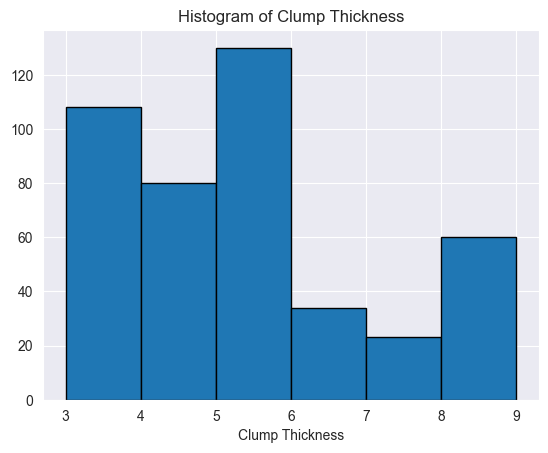

Pandas


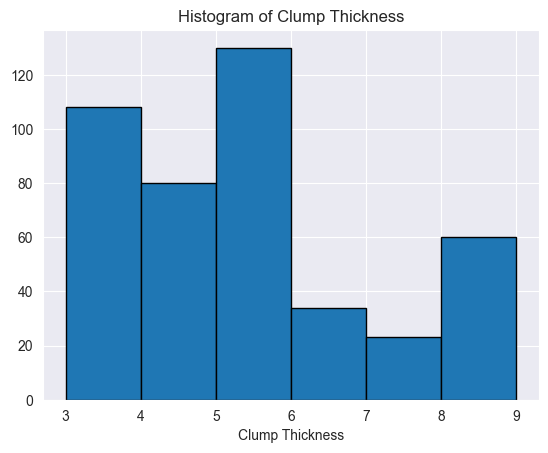

In [189]:
range = [3, 4, 5, 6, 7, 8, 9]

print('Numpy')
plt.hist(data_numpy_2['Clump_thickness'], bins=range, edgecolor='black')
plt.title('Histogram of Clump Thickness')
plt.xlabel('Clump Thickness')
plt.show()

print('Pandas')
plt.hist(data_pandas_2['Clump_thickness'], bins=range, edgecolor='black')
plt.title('Histogram of Clump Thickness')
plt.xlabel('Clump Thickness')
plt.show()

<b>4. Збудувати графік залежності одного integer/real атрибута від іншого.</b>

Numpy


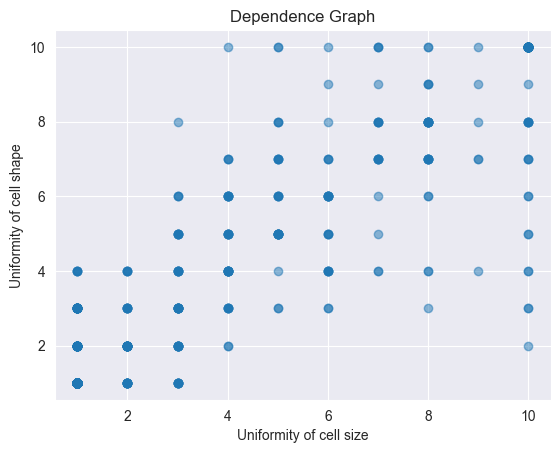

Pandas


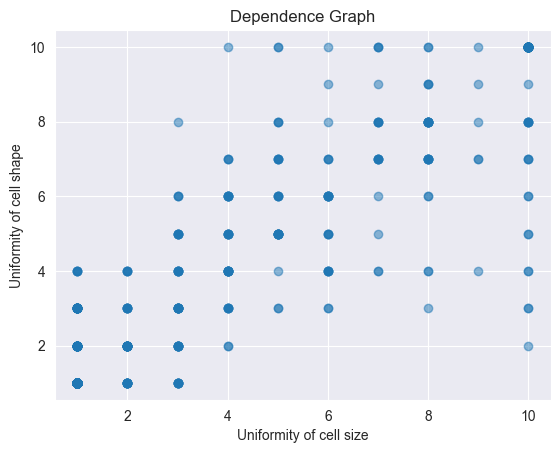

In [190]:
def graph_numpy(data):
    print('Numpy')
    x = data['Uniformity_of_cell_size']
    y = data['Uniformity_of_cell_shape']
    plt.scatter(x, y, alpha=0.5)
    plt.title('Dependence Graph')
    plt.xlabel('Uniformity of cell size')
    plt.ylabel('Uniformity of cell shape')
    plt.show()    
graph_numpy(data_numpy_2)

def graph_pandas(data):
    print('Pandas')
    x = data_pandas_2['Uniformity_of_cell_size']
    y = data_pandas_2['Uniformity_of_cell_shape']
    plt.scatter(x, y, alpha=0.5)
    plt.title('Dependence Graph')
    plt.xlabel('Uniformity of cell size')
    plt.ylabel('Uniformity of cell shape')
    plt.show()
graph_pandas(data_pandas_2)

<b>5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.</b>

In [191]:
def coefficients_numpy(data):
    x = data['Uniformity_of_cell_size']
    y = data['Uniformity_of_cell_shape']
    print("Numpy")
    print("Pearson coefficient:", pearsonr(x, y)[0])
    print("Spearman coefficient:", spearmanr(x, y)[0], "\n")
coefficients_numpy(data_numpy_2)

def coefficients_pandas(data):
    x = data['Uniformity_of_cell_size']
    y = data['Uniformity_of_cell_shape']
    print("Pandas")
    print("Pearson coefficient:", pearsonr(x, y)[0])
    print("Spearman coefficient:", spearmanr(x, y)[0])
coefficients_pandas(data_pandas_2)

Numpy
Pearson coefficient: 0.9068819130525939
Spearman coefficient: 0.8919037296687031 

Pandas
Pearson coefficient: 0.9068819130525939
Spearman coefficient: 0.8919037296687031


<b>6. Провести One Hot Encoding категоріального string атрибуту.</b>

In [192]:
def one_hot_encoding_pandas(column):
    return pd.get_dummies(column)
one_hot_encoding_pandas(data_pandas_2['Class'])

,benign,malignant
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
694,True,False
695,True,False
696,False,True
697,False,True


In [193]:
def one_hot_encoding_numpy(column):
    unique_values, encoded_column = np.unique(column, return_inverse=True)
    encoded_data = np.zeros((column.size, len(unique_values)), dtype=int)
    encoded_data[np.arange(column.size), encoded_column] = 1   
    return encoded_data

one_hot_encoding_numpy(data_numpy_2['Class'])[0:10]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

<b>7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі.</b>

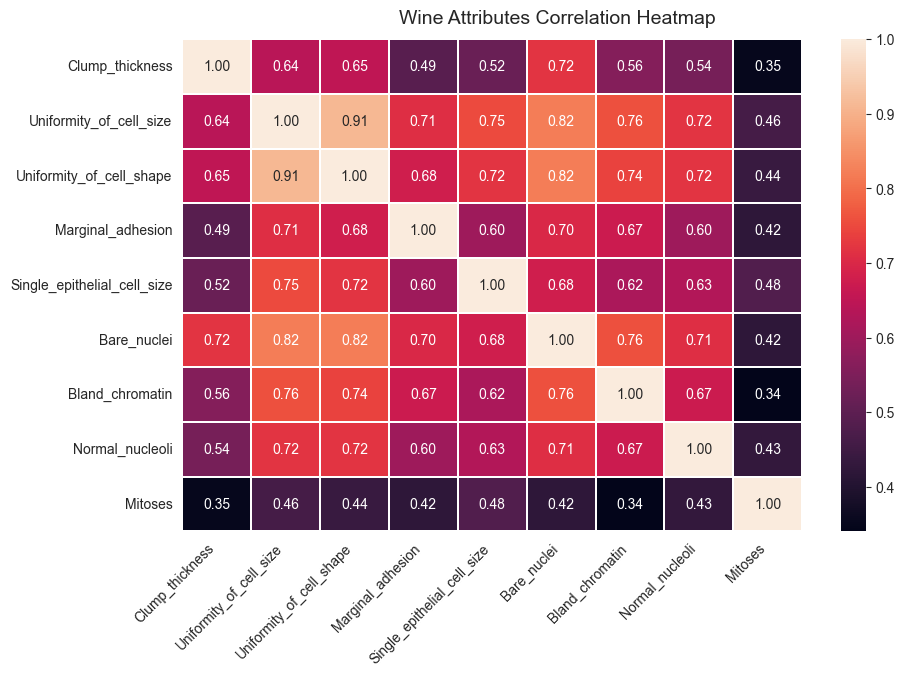

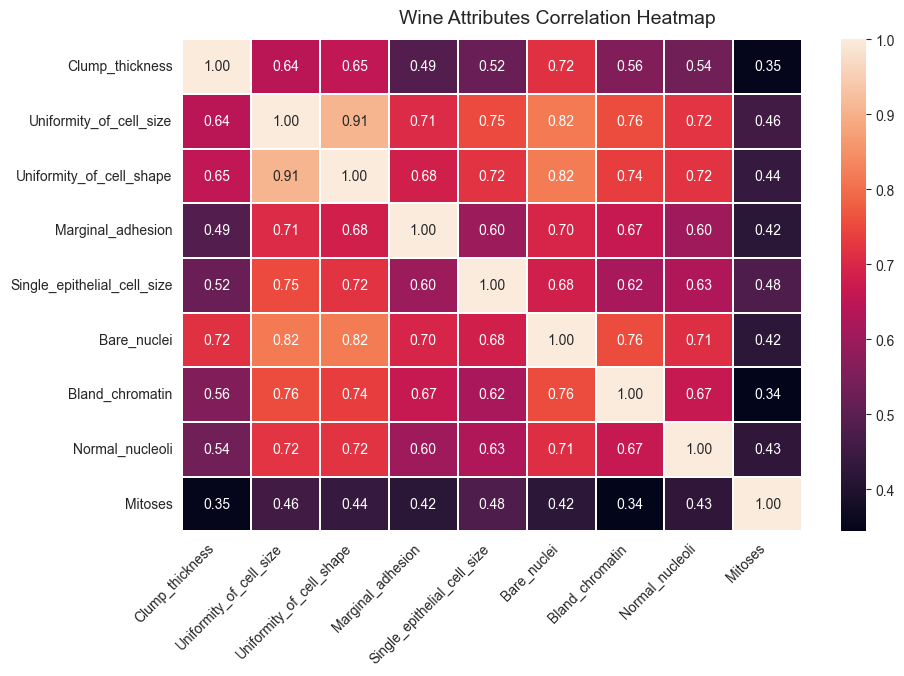

In [194]:
headers = ['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 
           'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 
           'Normal_nucleoli', 'Mitoses']

def graph_pandas(data, headers):
    f, ax = plt.subplots(figsize=(10, 6))
    corr = data.iloc[:, 1:-1].corr()
    hm = sns.heatmap(round(corr,2), annot=True, ax=ax,fmt='.2f', linewidths=.05)
    ax.set_xticklabels(headers, rotation=45, ha='right')
    ax.set_yticklabels(headers, rotation=0)
    f.subplots_adjust(top=0.93)
    t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)
graph_pandas(data_pandas_2, headers)

def graph_numpy(data, headers):
    corr = np.corrcoef(data, rowvar=False)
    f, ax = plt.subplots(figsize=(10, 6))
    hm = sns.heatmap(corr, annot=True, ax=ax, fmt='.2f', linewidths=.05)
    ax.set_xticklabels(headers, rotation=45, ha='right')
    ax.set_yticklabels(headers, rotation=0)
    f.subplots_adjust(top=0.93)
    t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)
graph_data = np.genfromtxt('data_numpy_2.txt', delimiter=',', dtype=int)
graph_data = graph_data[:, 1:-1]
graph_numpy(graph_data, headers)